## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

# Importing Dataset

In [3]:
data = pd.read_csv("../input/digit-recognizer/train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(42000, 785)

For the test dataset, it has 42000 entries and consist of 28X28 pixels.

In [6]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [9]:
z_train = Counter(data['label'])
z_train

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

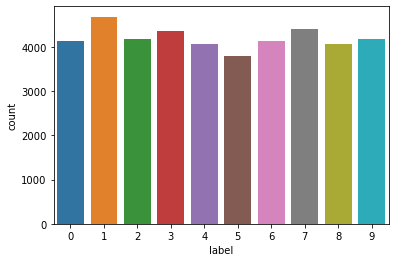

In [10]:
sns.countplot(data['label'])

# Splitting data into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

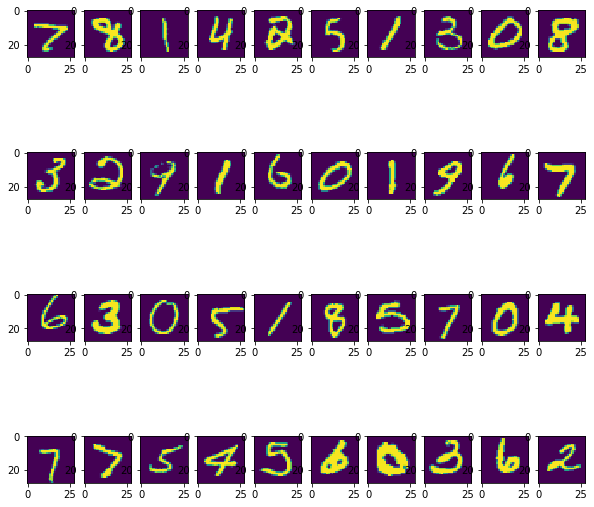

In [12]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(10,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

## Normalizing data

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

## Reshaping data for keras

In [14]:
x_train = X_train.reshape(X_train.shape[0], 28, 28,1)
x_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [15]:
y_train

array([7, 8, 1, ..., 2, 1, 1])

In [16]:
# convert class vectors to binary class matrices One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)

In [17]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Building CNN

## Initiazing CNN

In [18]:
cnn = tf.keras.models.Sequential()

## Step 1 - Convolution layer, which will mark the important feature in the image through filter detector

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

## Step 2 - Pooling

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a second convolutional layer

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Step 3 - Flattening, to input the data in NN

In [22]:
cnn.add(tf.keras.layers.Flatten())

## Step 4 - Full Connection

In [23]:
cnn.add(tf.keras.layers.Dense(units=56, activation='relu'))

## Step 5 - Output Layer

In [24]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Step 6 - Compiling CNN

In [25]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training on CNN

In [44]:
cnn.fit(x_train, y_train, batch_size = 64, epochs = 10)

Epoch 1/10
591/591 [==============================] - 12s 21ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 2/10
591/591 [==============================] - 12s 21ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 3/10
591/591 [==============================] - 12s 20ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 4/10
591/591 [==============================] - 12s 20ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 5/10
591/591 [==============================] - 12s 21ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 6/10
591/591 [==============================] - 12s 20ms/step - loss: 0.0057 - accuracy: 0.9978
Epoch 7/10
591/591 [==============================] - 12s 20ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 8/10
591/591 [==============================] - 12s 21ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 9/10
591/591 [==============================] - 12s 20ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 10/10
591/591 [==============================] - 12s 21ms/step - loss: 0.005

* ## Predciting the test set

In [45]:
y_pred = cnn.predict(x_test)

In [46]:
y_pred

array([[3.05725822e-17, 1.00000000e+00, 5.13520108e-13, ...,
        6.39704739e-12, 5.12403759e-13, 2.32797979e-16],
       [1.81629288e-16, 1.41745719e-17, 3.95537619e-24, ...,
        5.02121799e-26, 9.03755236e-17, 6.88225681e-13],
       [1.26593177e-17, 3.09655218e-11, 1.00000000e+00, ...,
        9.31614646e-18, 2.61183653e-13, 1.93921246e-21],
       ...,
       [2.77751377e-24, 6.07684521e-22, 4.52494897e-21, ...,
        2.49348202e-17, 1.09629224e-16, 5.71569892e-17],
       [1.00000000e+00, 7.16723867e-23, 7.57790553e-10, ...,
        9.18132998e-20, 1.23805681e-15, 4.35906502e-19],
       [1.00000000e+00, 1.41752250e-24, 4.80213852e-15, ...,
        8.78227999e-25, 2.64335732e-15, 1.74577825e-17]], dtype=float32)

So in the above observation we have probability of occurence of each digit. So it has to be changed into final outcome. The following code will do so.

In [47]:
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_pred_classes

array([1, 5, 2, ..., 4, 0, 0])

In [48]:
y_test

array([1, 5, 2, ..., 4, 0, 0])

## Confusion matrix

In [49]:
cm = confusion_matrix(y_pred_classes, y_test)

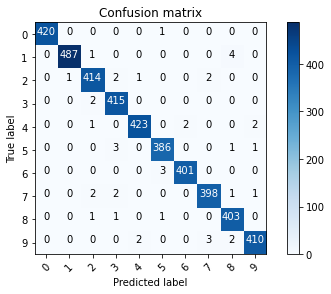

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, classes = range(10))

From confusion matrix it can be observed that the model has performed well in classifaction in digits.

In [51]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm)

0.9897619047619047

So the above model has a accuracy of 98%. Hence model has performed well.
Now lets look at the precision value for each digit classification. Precision tells how often the it is correct.

In [52]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
row = cm.shape[0]

print("label precision")
for i in range(10):
    print(f"{i:5d} {precision(i, cm):9.3f}")

label precision
    0     1.000
    1     0.998
    2     0.983
    3     0.981
    4     0.993
    5     0.987
    6     0.995
    7     0.988
    8     0.981
    9     0.990


The precision values for each label have performed well enough.

# Results for Test Data

In [53]:
data_test = pd.read_csv("../input/digit-recognizer/test.csv")

In [54]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data_test.shape

(28000, 784)

In [56]:
testdata = data_test.iloc[:, :].values

In [57]:
testdata

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
data_prep = testdata.reshape(testdata.shape[0], 28, 28, 1)

In [59]:
final_pred = cnn.predict(data_prep)
final_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [60]:
final_pred_classes = np.argmax(final_pred, axis = 1) 
final_pred_classes

array([2, 0, 9, ..., 3, 9, 2])

# Saving results to csv

In [65]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(final_pred_classes)+1)),
                         "Label": final_pred_classes})
submissions.to_csv("result.csv", index=False, header=True)